# Data Analysis
---

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

### Load data files

Note to self: ask Wu-Jung and/or Don which CTD and METBK variables I should actually be using. There are raw measurements with specified fill values, and there are qc versions that might be better to work with.

In [3]:
METBK_data = pd.read_csv('../../coastal_upwelling_output/metbk_data_2018.csv')
profiler_data = pd.read_csv('../../coastal_upwelling_output/profiler_data_2018.csv')
platform_data = pd.read_csv('../../coastal_upwelling_output/platform_data_2018.csv')

In [4]:
# Specify the variable(s) of interest
METBK_var = ['sea_surface_temperature', 'met_windavg_mag_corr_east', 'met_windavg_mag_corr_north']
profiler_var = ['seawater_pressure', 'density', 'practical_salinity', 'seawater_temperature', 'corrected_dissolved_oxygen']
platform_var = ['seawater_pressure', 'density', 'practical_salinity', 'seawater_temperature', 'dissolved_oxygen']

In [5]:
# Specify the units for each variable of interest
METBK_units = {'sea_surface_temperature': ['ºC'], 'met_windavg_mag_corr_east': ['m s-1'], 'met_windavg_mag_corr_north': ['m s-1']}
profiler_units = {'seawater_pressure': ['dbar'], 'density': ['kg m-3'], 'practical_salinity': ['1'], 'seawater_temperature': ['ºC'], 'corrected_dissolved_oxygen': ['µmol kg-1']}
platform_units = {'seawater_pressure': ['dbar'], 'density': ['kg m-3'], 'practical_salinity': ['1'], 'seawater_temperature': ['ºC'], 'dissolved_oxygen': ['µmol kg-1']}

### Inspect the data
Let's see how much data we have...

In [6]:
print(METBK_data.shape)
print(profiler_data.shape)
print(platform_data.shape)

(310067, 4)
(13164703, 6)
(10074761, 6)


Once again, way too many observations to pass to any plotting function, so I'll resample down later to minutes or hours or days, or all three. 

See what the data looks like:

In [7]:
METBK_data

time  sea_surface_temperature  \
0       2018-04-03 18:26:39.426999808                   10.135   
1       2018-04-03 18:27:43.659999744                   10.136   
2       2018-04-03 18:28:48.444000256                   10.141   
3       2018-04-03 18:29:52.679000064                   10.141   
4       2018-04-03 18:30:27.203999744                   10.136   
...                               ...                      ...   
310062  2018-12-31 09:35:21.017000448                   11.750   
310063  2018-12-31 09:36:26.114000384                   11.751   
310064  2018-12-31 09:37:30.170999808                   11.758   
310065  2018-12-31 09:38:37.085000192                   11.753   
310066  2018-12-31 09:39:38.632000000                   11.762   

        met_windavg_mag_corr_east  met_windavg_mag_corr_north  
0                       -1.700006                   -1.983426  
1                       -2.854736                   -2.457026  
2                       -1.223021                   -2.973268  
3                       -2.237504                   -2.168889  
4                       -1.361928                   -2.531334  
...                           ...                         ...  
310062                   2.496349                   -6.370490  
310063                   1.183581                   -7.435216  
310064                   2.250494                   -7.588503  
310065                   2.812786                   -6.963421  
310066                   3.301284                   -8.607492  

[310067 rows x 4 columns]

In [8]:
profiler_data

time  seawater_pressure      density  \
0         2018-07-17 15:38:50.061576192          81.279138  1026.516091   
1         2018-07-17 15:38:51.061581824          81.182077  1026.515845   
2         2018-07-17 15:38:52.061271552          81.084999  1026.515921   
3         2018-07-17 15:38:53.061588992          80.987921  1026.517571   
4         2018-07-17 15:38:54.061177344          80.889759  1026.518862   
...                                 ...                ...          ...   
13164698  2018-12-31 11:59:55.458120192          61.875097  1025.117886   
13164699  2018-12-31 11:59:56.458231296          61.828144  1025.117640   
13164700  2018-12-31 11:59:57.458030592          61.794006  1025.117535   
13164701  2018-12-31 11:59:58.457932288          61.756694  1025.117198   
13164702  2018-12-31 11:59:59.458563072          61.724677  1025.116944   

          practical_salinity  seawater_temperature  corrected_dissolved_oxygen  
0                  33.675824              8.613400                   92.728326  
1                  33.675754              8.611768                   92.708655  
2                  33.676071              8.610009                   92.688996  
3                  33.678387              8.608188                   92.679191  
4                  33.680522              8.607749                   92.633305  
...                      ...                   ...                         ...  
13164698           32.660133             11.666675                  258.166072  
13164699           32.660090             11.666675                  258.112745  
13164700           32.660169             11.666744                  258.100726  
13164701           32.660002             11.666952                  258.181654  
13164702           32.659894             11.667090                  258.221535  

[13164703 rows x 6 columns]

In [9]:
platform_data

time  seawater_pressure      density  \
0         2018-07-17 15:16:20.566366208         196.741005  1027.523294   
1         2018-07-17 15:16:21.565952512         196.743134  1027.522706   
2         2018-07-17 15:16:22.564911616         196.737798  1027.522188   
3         2018-07-17 15:16:23.566372352         196.736736  1027.521963   
4         2018-07-17 15:16:24.565125632         196.732468  1027.521513   
...                                 ...                ...          ...   
10074756  2018-12-31 11:59:55.363662848         197.703089  1027.157078   
10074757  2018-12-31 11:59:56.363566080         197.698820  1027.157456   
10074758  2018-12-31 11:59:57.363363840         197.698817  1027.158236   
10074759  2018-12-31 11:59:58.363266048         197.696683  1027.159124   
10074760  2018-12-31 11:59:59.363586048         197.697750  1027.159399   

          practical_salinity  seawater_temperature  dissolved_oxygen  
0                  33.981238              7.006586         83.921237  
1                  33.980552              7.007007         83.928797  
2                  33.980022              7.007548         83.935476  
3                  33.979785              7.007788         83.963296  
4                  33.979280              7.008028         84.000929  
...                      ...                   ...               ...  
10074756           33.863666              8.853098        113.586892  
10074757           33.863887              8.851699        113.587973  
10074758           33.864546              8.850046        113.583926  
10074759           33.865642              8.849791        113.620820  
10074760           33.866274              8.851190        113.632434  

[10074761 rows x 6 columns]

Looks like the data availability might actually be worse than it was in 2017 based on these start and end dates - the METBK data starts in April, while the platform and profiler data both start in July. But if the profiler data captures the full upper water column for the entire July-December period then it'll definitely be worth working with! 

Do a simple `.describe()`

In [10]:
METBK_data.describe()

sea_surface_temperature  met_windavg_mag_corr_east  \
count            310067.000000              310047.000000   
mean                 13.332545                   0.941428   
std                   1.820579                   2.681190   
min                  10.027000                 -21.107732   
25%                  11.873000                  -0.524880   
50%                  13.209000                   1.046930   
75%                  14.801000                   2.443717   
max                  19.162001                  23.068557   

       met_windavg_mag_corr_north  
count               310047.000000  
mean                    -1.005004  
std                      5.459872  
min                    -14.207122  
25%                     -5.335514  
50%                     -2.105809  
75%                      3.032121  
max                     28.674350

In [11]:
METBK_data.isna().sum()

time                           0
sea_surface_temperature        0
met_windavg_mag_corr_east     20
met_windavg_mag_corr_north    20
dtype: int64

I actually didn't expect to see nulls here, I thought they'd all be filled in with some standard. Will have to decide how to best fill or drop those later.

In [12]:
profiler_data.describe()

seawater_pressure       density  practical_salinity  \
count       1.316470e+07  1.316470e+07        1.316470e+07   
mean        1.347137e+02  1.026722e+03        3.367210e+01   
std         6.283194e+01  8.039638e-01        4.331177e-01   
min         4.122659e+00  1.022584e+03        2.880009e+01   
25%         7.871900e+01  1.026328e+03        3.358868e+01   
50%         1.534360e+02  1.027063e+03        3.388757e+01   
75%         1.945093e+02  1.027346e+03        3.394925e+01   
max         2.006280e+02  1.027528e+03        3.406700e+01   

       seawater_temperature  corrected_dissolved_oxygen  
count          1.316470e+07                1.316470e+07  
mean           8.798551e+00                1.323936e+02  
std            1.333831e+00                5.735800e+01  
min            6.960023e+00                4.479598e+01  
25%            7.923510e+00                9.356858e+01  
50%            8.452451e+00                1.129539e+02  
75%            9.196452e+00                1.611279e+02  
max            1.835396e+01                3.049132e+02

In [13]:
profiler_data.isna().sum()

time                          0
seawater_pressure             0
density                       0
practical_salinity            0
seawater_temperature          0
corrected_dissolved_oxygen    0
dtype: int64

No nulls because they've already been filled with designated values and then removed.

In [14]:
platform_data.describe()

seawater_pressure       density  practical_salinity  \
count       1.007476e+07  1.007476e+07        1.007476e+07   
mean        1.976339e+02  1.027343e+03        3.393275e+01   
std         8.817969e-01  9.520519e-02        3.637695e-02   
min         1.953235e+02  1.024766e+03        3.049892e+01   
25%         1.970404e+02  1.027283e+03        3.391960e+01   
50%         1.976507e+02  1.027354e+03        3.394223e+01   
75%         1.981777e+02  1.027412e+03        3.395487e+01   
max         2.047649e+02  1.027539e+03        3.400634e+01   

       seawater_temperature  dissolved_oxygen  
count          1.007476e+07      1.007476e+07  
mean           7.997421e+00      9.833123e+01  
std            4.794050e-01      1.546252e+01  
min            6.928382e+00      4.762297e+01  
25%            7.683193e+00      9.240028e+01  
50%            7.985277e+00      1.011981e+02  
75%            8.341731e+00      1.078280e+02  
max            9.237419e+00      1.510208e+02

In [15]:
platform_data.isna().sum()

time                    0
seawater_pressure       0
density                 0
practical_salinity      0
seawater_temperature    0
dissolved_oxygen        0
dtype: int64

---
# METBK data

The process for investigating this data will be the same as in the previous notebook. 

In [16]:
METBK_data['time']

0         2018-04-03 18:26:39.426999808
1         2018-04-03 18:27:43.659999744
2         2018-04-03 18:28:48.444000256
3         2018-04-03 18:29:52.679000064
4         2018-04-03 18:30:27.203999744
                      ...              
310062    2018-12-31 09:35:21.017000448
310063    2018-12-31 09:36:26.114000384
310064    2018-12-31 09:37:30.170999808
310065    2018-12-31 09:38:37.085000192
310066    2018-12-31 09:39:38.632000000
Name: time, Length: 310067, dtype: object

Convert the time column from strings to datetimes for plotting and resampling.

In [17]:
METBK_data['time'] = pd.to_datetime(METBK_data['time'])

In [18]:
METBK_data['time']

0        2018-04-03 18:26:39.426999808
1        2018-04-03 18:27:43.659999744
2        2018-04-03 18:28:48.444000256
3        2018-04-03 18:29:52.679000064
4        2018-04-03 18:30:27.203999744
                      ...             
310062   2018-12-31 09:35:21.017000448
310063   2018-12-31 09:36:26.114000384
310064   2018-12-31 09:37:30.170999808
310065   2018-12-31 09:38:37.085000192
310066   2018-12-31 09:39:38.632000000
Name: time, Length: 310067, dtype: datetime64[ns]

Do the same for the other dataframes.

In [19]:
profiler_data['time'] = pd.to_datetime(profiler_data['time'])
platform_data['time'] = pd.to_datetime(platform_data['time'])

Generate a quick plot of the northward wind velocity data.

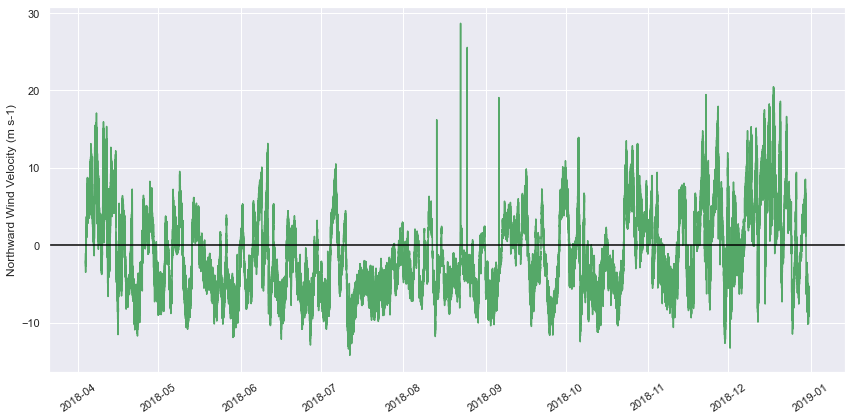

In [20]:
fig, ax = plt.subplots(1,1, sharex=True, figsize = (12, 6)) 

ax.plot(METBK_data['time'], METBK_data['met_windavg_mag_corr_north'], 'g')
ax.set_xlabel('')
ax.set_ylabel('Northward Wind Velocity ({})'.format(METBK_units['met_windavg_mag_corr_north'][0]))
ax.axhline(y=0, ls='-', c='black') # add horizontal line at 0

plt.xticks(rotation=35);
plt.tight_layout()

As expected, northward wind velocity is mostly negative in the summer months and shifts to more positive values towards the end of the year. There are a few very large positive values in August and one in the start of September - they look too singular to just be strong wind gusts, they might be errors.

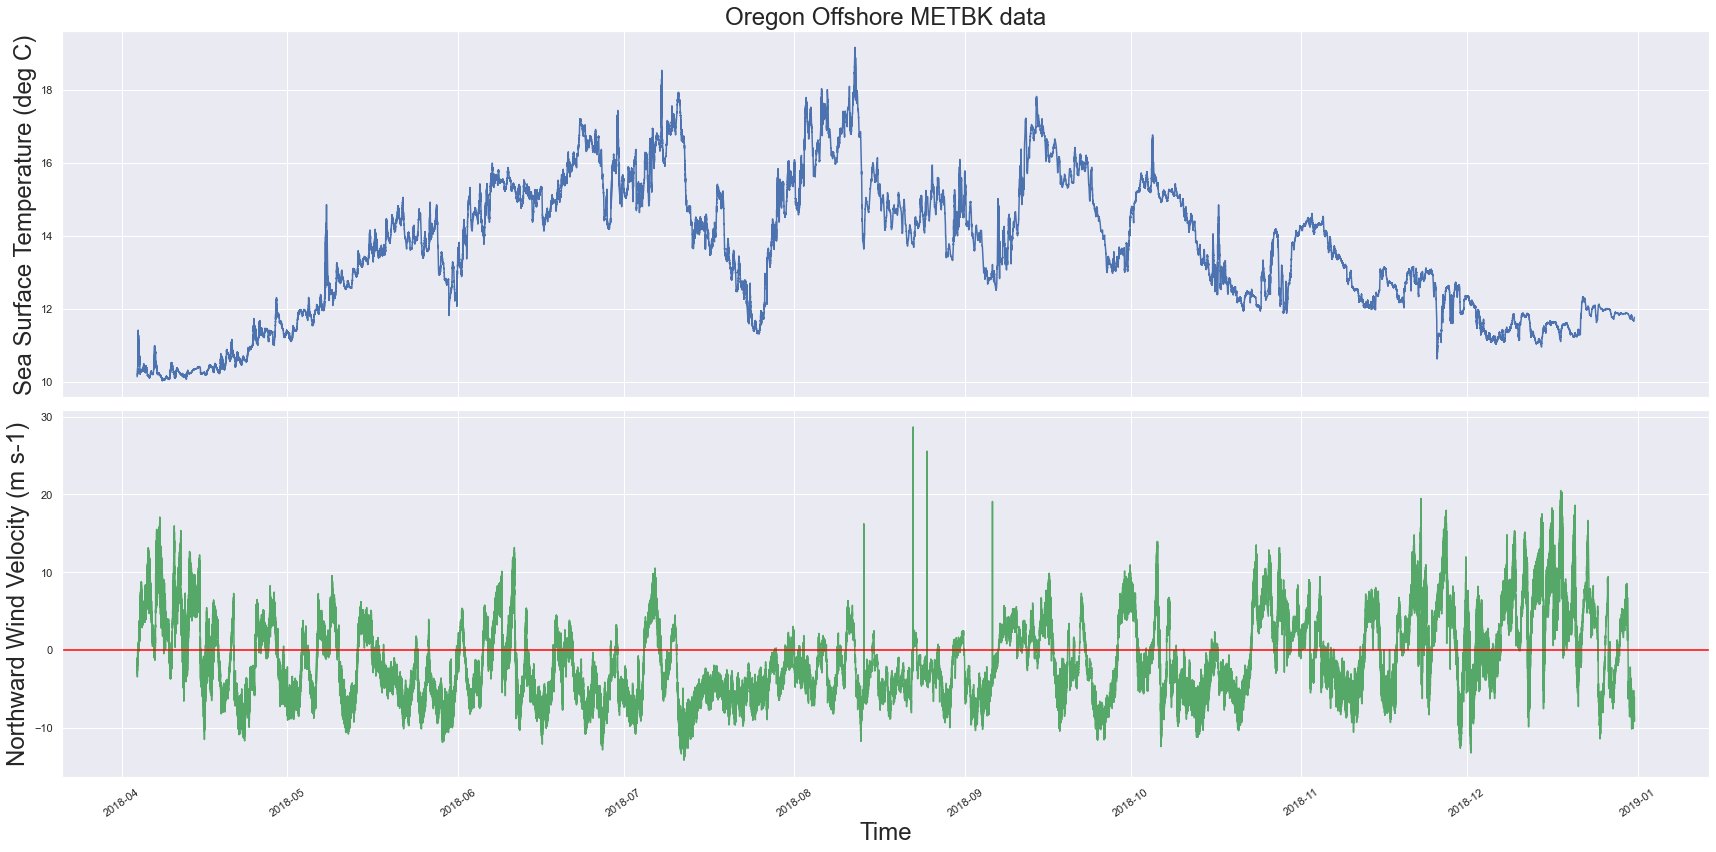

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (24, 12)) 
ax1.plot(METBK_data['time'], METBK_data['sea_surface_temperature'], 'b')
ax1.set_ylabel('Sea Surface Temperature (deg C)', size=24)
ax1.set_title('Oregon Offshore METBK data', size=24)

ax2.plot(METBK_data['time'], METBK_data['met_windavg_mag_corr_north'], 'g')
ax2.set_xlabel('Time', size=24)
ax2.set_ylabel('Northward Wind Velocity ({})'.format(METBK_units['met_windavg_mag_corr_north'][0]), size=24)
ax2.axhline(y=0, ls='-', c='red') # add horizontal line at 0

plt.xticks(rotation=35);
plt.tight_layout()
plt.savefig('../figures/METBK_SST_NWind.png')

Fortunately, this data showcases the same relationship between northward wind velocity and sea surface temperatures as teh 2017 data, even if  it's not the full year.

Let's resample the data like in the previous analysis.

In [22]:
METBK_hourly = METBK_data.resample('H', on='time').mean().dropna(how='all').reset_index()
METBK_hourly

time  sea_surface_temperature  met_windavg_mag_corr_east  \
0    2018-04-03 18:00:00                10.156735                  -1.743519   
1    2018-04-03 19:00:00                10.202933                  -1.344641   
2    2018-04-03 20:00:00                10.358683                  -0.948297   
3    2018-04-03 21:00:00                10.696883                  -0.793759   
4    2018-04-03 22:00:00                10.975217                  -0.522161   
...                  ...                      ...                        ...   
6407 2018-12-30 23:00:00                11.731778                   2.615652   
6408 2018-12-31 00:00:00                11.707667                   2.569695   
6409 2018-12-31 03:00:00                11.687889                   1.319086   
6410 2018-12-31 06:00:00                11.662000                   0.165530   
6411 2018-12-31 09:00:00                11.755445                   2.525219   

      met_windavg_mag_corr_north  
0                      -2.333998  
1                      -2.211151  
2                      -1.257916  
3                      -0.946210  
4                      -0.267529  
...                          ...  
6407                   -7.096692  
6408                   -8.047529  
6409                   -8.408589  
6410                   -6.525188  
6411                   -7.555615  

[6412 rows x 4 columns]

In [23]:
METBK_daily = METBK_data.resample('D', on='time').mean().dropna(how='all').reset_index()
METBK_daily

time  sea_surface_temperature  met_windavg_mag_corr_east  \
0   2018-04-03                10.546653                  -0.905186   
1   2018-04-04                10.420728                   0.343509   
2   2018-04-05                10.257710                   0.468498   
3   2018-04-06                10.319824                   0.351149   
4   2018-04-07                10.340401                   2.714342   
..         ...                      ...                        ...   
268 2018-12-27                11.828190                   2.306342   
269 2018-12-28                11.863302                   2.629582   
270 2018-12-29                11.867286                   5.171150   
271 2018-12-30                11.801278                   4.582519   
272 2018-12-31                11.703250                   1.644882   

     met_windavg_mag_corr_north  
0                     -1.066283  
1                      4.540107  
2                      7.737668  
3                      3.680510  
4                      9.961374  
..                          ...  
268                   -4.184130  
269                    0.889073  
270                    4.819267  
271                   -4.097571  
272                   -7.634230  

[273 rows x 4 columns]

The resulting dataframes are much smaller, which will speed up plotting.

We can quickly calculate the percentage of time in 2018 that winds are blowing towards the south and get an idea of how much of the year might see favorable conditions for upwelling. Again, northward wind velocity is not the only indicator of upwelling conditions, we'll need to look at a calculated index for that later.

In [24]:
north_winds = np.array(METBK_hourly['met_windavg_mag_corr_north'])
upwelling_percentage = len(north_winds[north_winds < 0]) / len(north_winds) * 100
print('{}%'.format(round(upwelling_percentage)))

63%


Winds are blowing from North to South for about 63% of our time period. This is similar to the 58% calculated in 2017. I wonder how these values are skewed by the limited data - if we had the whole year, would this value increase or decrease?

### Summer months

We can zoom in on just a few months worth of data to get a closer look at negative northward wind velocities and downward spikes in sea surface temperature.

In [25]:
# Grab times of interest
mask = (METBK_hourly['time'][:] > '2018-04-01') & (METBK_hourly['time'] <= '2018-08-01')
METBK_summer_data = METBK_hourly.loc[mask]

METBK_summer_data.head()

time  sea_surface_temperature  met_windavg_mag_corr_east  \
0 2018-04-03 18:00:00                10.156735                  -1.743519   
1 2018-04-03 19:00:00                10.202933                  -1.344641   
2 2018-04-03 20:00:00                10.358683                  -0.948297   
3 2018-04-03 21:00:00                10.696883                  -0.793759   
4 2018-04-03 22:00:00                10.975217                  -0.522161   

   met_windavg_mag_corr_north  
0                   -2.333998  
1                   -2.211151  
2                   -1.257916  
3                   -0.946210  
4                   -0.267529

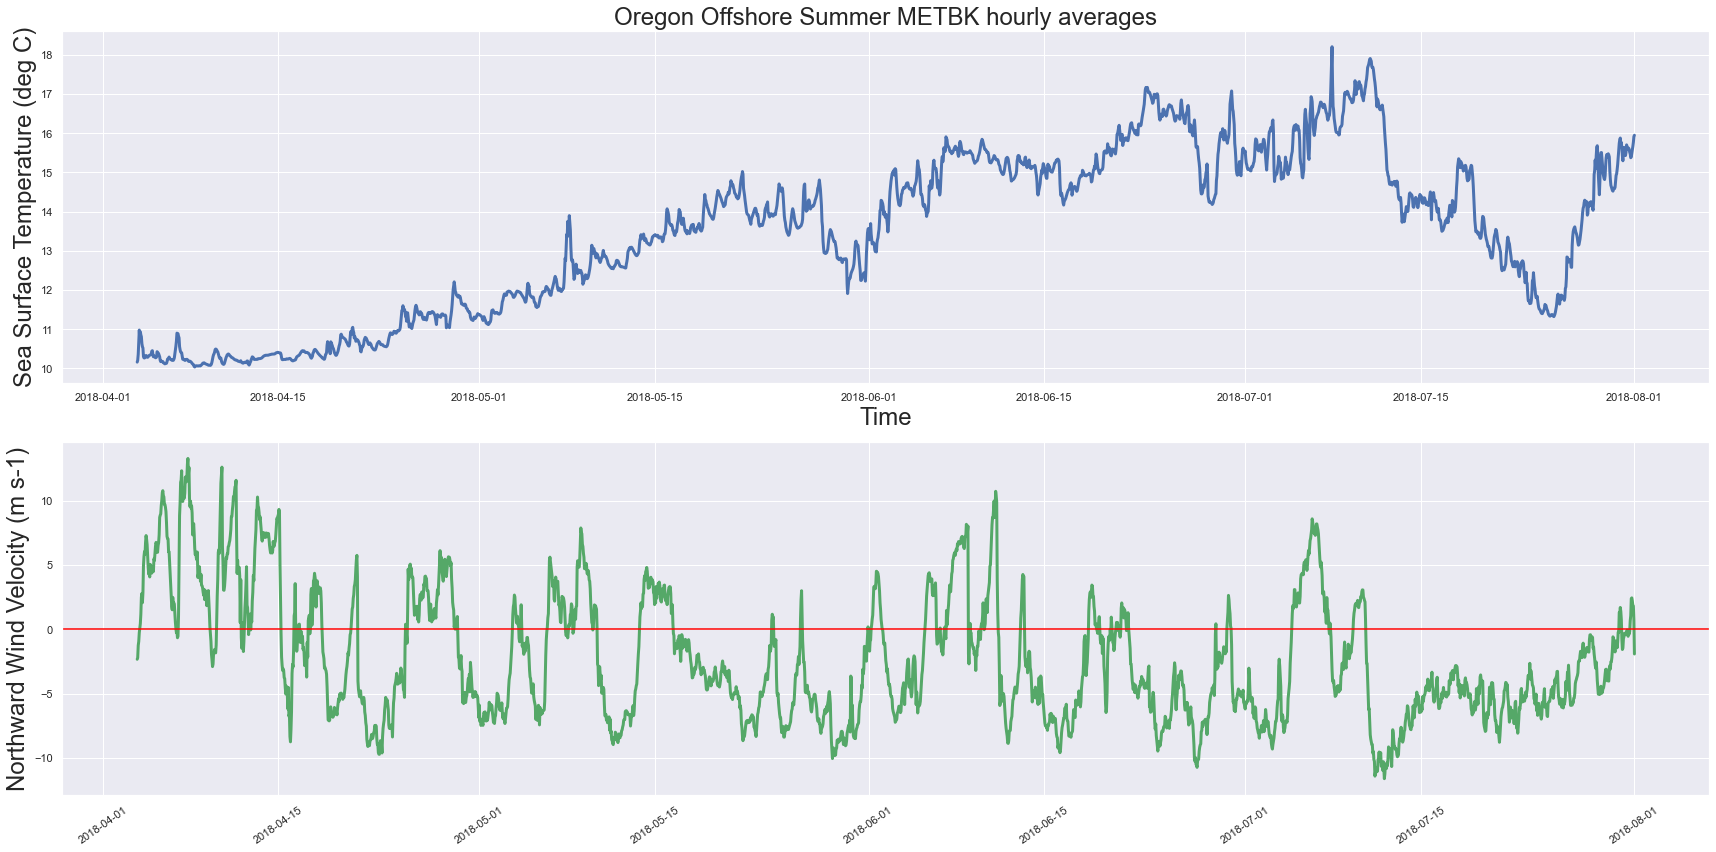

In [26]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(24, 12))

#ax2 = ax.twinx()  # instantiate a second axis that shares the same x-axis
ax.plot(METBK_summer_data['time'], METBK_summer_data['sea_surface_temperature'], 'b', linewidth=3)
ax.set_ylabel('Sea Surface Temperature (deg C)', size=24)
ax.set_xlabel('Time', size=24)

ax2.plot(METBK_summer_data['time'], METBK_summer_data['met_windavg_mag_corr_north'], 'g', linewidth=3)
ax2.set_ylabel('Northward Wind Velocity (m s-1)', size=24)
plt.xticks(rotation=35)

ax2.axhline(y=0, ls='-', c='red') # add horizontal line at 0
ax.set_title('Oregon Offshore Summer METBK hourly averages', size=24);

plt.tight_layout()
plt.savefig('../figures/METBK_SST_NWind_summer.png')

Is it easier to see the connection between wind velocity and sea surface temperature now? There's a bit of a lag in time between southward blowing winds and colder temperature measurements. The relationship will be more clear when we look at the upwelling index later. 

---
# Profiler data
As I wrote in the previous notebook, the profiler we're using goes up and down in the water column on a wire, from ~20 meters to ~200 meters, 9 times a day. This will give us an idea of how the water column changes in upwelling conditions.

Ever tried plotting 20M observations? Neither have I, and I don't want to start now! We can resample the CTD data to a 1 minute scale, an hourly scale, and a daily scale. I have lots of questions about whether or not this is really a good idea though. If the profiler is moving up and down through the water column on a schedule, then looking at resampled data could actually give us an incorrect impression of the temperature patterns in the water column. This is something I need to come back to later; for now, let's resample and continue on.

In [27]:
profiler_data['time']

0          2018-07-17 15:38:50.061576192
1          2018-07-17 15:38:51.061581824
2          2018-07-17 15:38:52.061271552
3          2018-07-17 15:38:53.061588992
4          2018-07-17 15:38:54.061177344
                        ...             
13164698   2018-12-31 11:59:55.458120192
13164699   2018-12-31 11:59:56.458231296
13164700   2018-12-31 11:59:57.458030592
13164701   2018-12-31 11:59:58.457932288
13164702   2018-12-31 11:59:59.458563072
Name: time, Length: 13164703, dtype: datetime64[ns]

In [28]:
profiler_minutes = profiler_data.resample('T', on='time').mean().dropna(how='all').reset_index()
METBK_minutes = METBK_data.resample('T', on='time').mean().dropna(how='all').reset_index()
# profiler_minutes.head()

profiler_hourly = profiler_data.resample('H', on='time').mean().dropna(how='all').reset_index()
# profiler_hourly.head()

profiler_daily = profiler_data.resample('D', on='time').mean().dropna(how='all').reset_index()
# profiler_daily.head()

Now we can see how the profiler data looks:

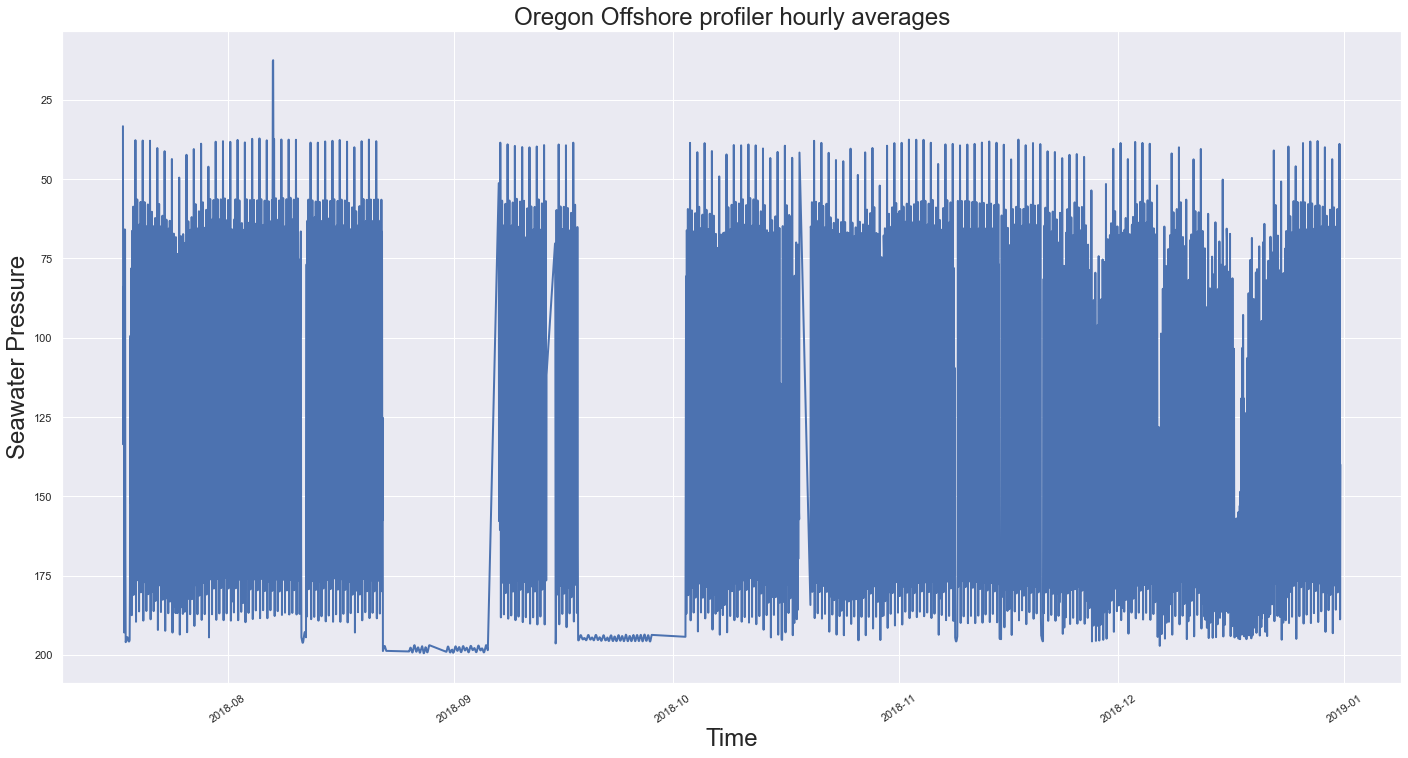

In [29]:
# Plot hourly-averaged METBK data
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(profiler_hourly['time'], profiler_hourly['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

There are still some periods where the instrument package went down for some reason, looks like it stopped collecting data for a brief moment in mid August, for longer periods of time around the start and end of Semptember, and possibly again for short moments in October, November, and December. The only annotations I found on the OOI data access portal were for September 16, 2018, and August 22-24, 2018. 

Note that the December data follows the choppy upper limit pattern of the rest of the year but doesn't reach the same height in the water column. To me, the seawater pressure data here resembles real data more than the flat periods in September, so I'm wondering if the profiler was still functioning properly but its reach was impacted by strong currents, downwelling, or some other environmental factor.

In [30]:
mask = (profiler_data['time'][:] > '2018-08-18') & (profiler_data['time'] <= '2018-08-22')
profiler_week = profiler_data.loc[mask]

profiler_week.shape

(345594, 6)

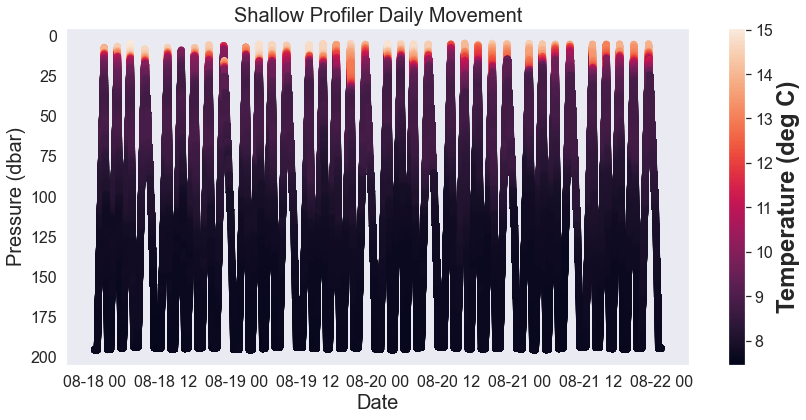

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
, ,
ax.invert_yaxis()
ax.grid()

sc = ax.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['seawater_temperature'])
ax.set_xlabel('Date', size=20)
ax.set_ylabel('Pressure (dbar)', size=20)
ax.set_title('Shallow Profiler Daily Movement', size=20)
cb = fig.colorbar(sc,ax=ax)

# ax.tick_params(labelsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
# cb = fig.colorbar(sc,ax=ax)
cb.set_label(label='Temperature (deg C)',weight='bold', size=24)
cb.ax.tick_params(labelsize=16)

plt.tight_layout()
# plt.savefig('../figures/CTD_profiler_5days.png')

We can generate similar plots with salinity, dissolved oxygen, and density! Each of these variables should have a similar or identical pattern as the plot above. 

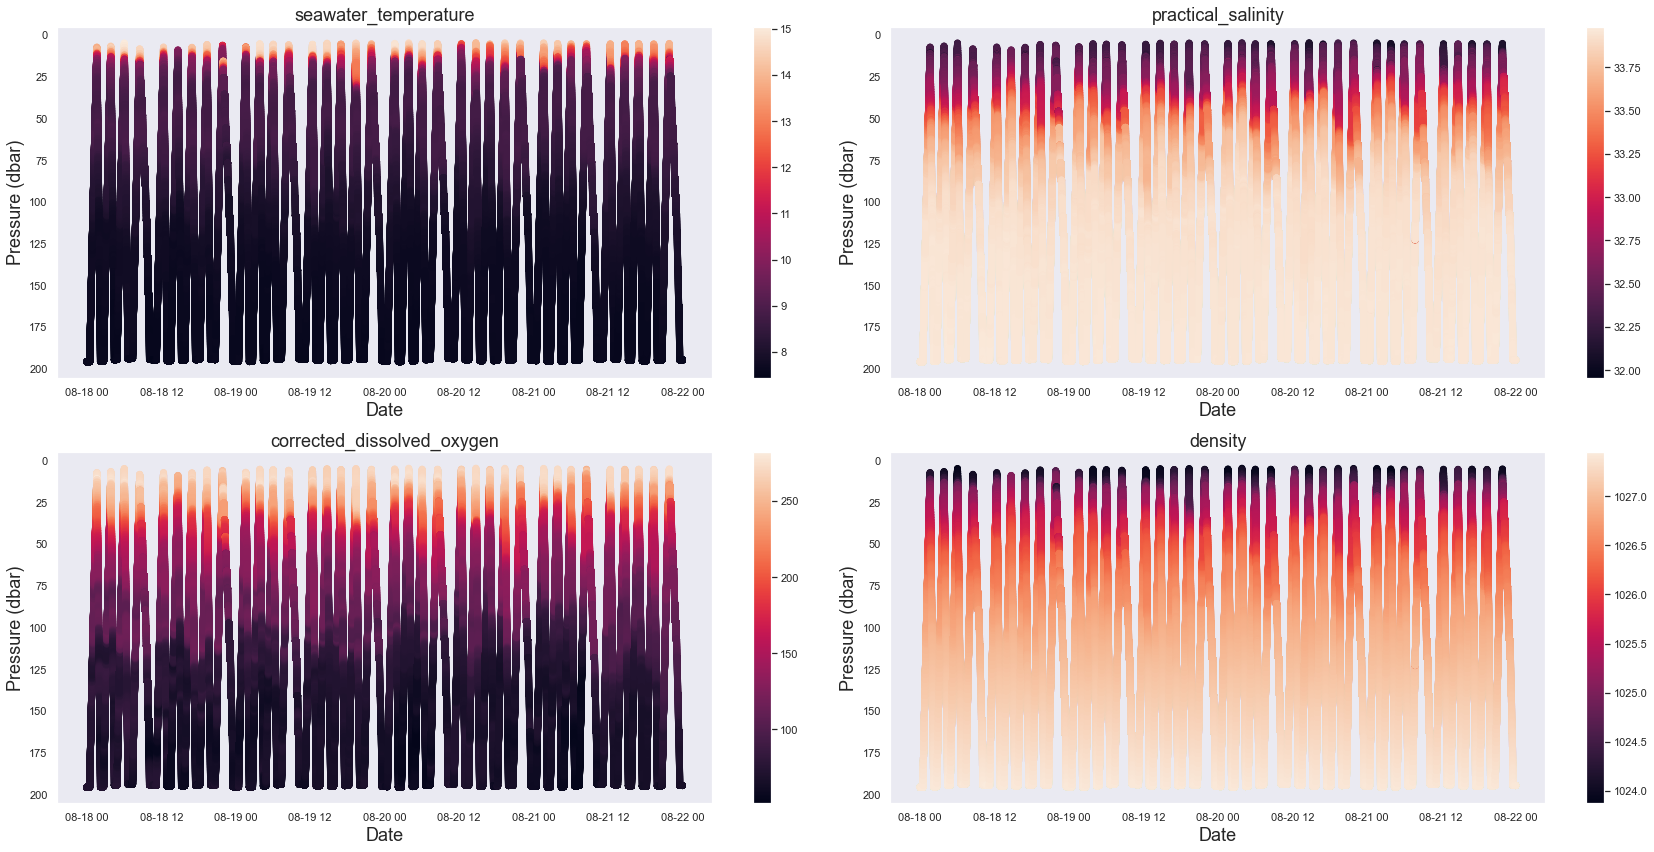

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

for ax in [ax1, ax2, ax3, ax4]:
    ax.invert_yaxis()
    ax.grid()
    ax.set_xlabel('Date', size=18)
    ax.set_ylabel('Pressure (dbar)', size=18)

#ax1.set_xlim(profiler_week['time'],profiler_week['time'])
sc = ax1.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['seawater_temperature'])
cb = fig.colorbar(sc,ax=ax1)
ax1.set_title('seawater_temperature', size=18)

sc = ax2.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['practical_salinity'])
cb = fig.colorbar(sc,ax=ax2)
ax2.set_title('practical_salinity', size=18)

sc = ax3.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['corrected_dissolved_oxygen'])
cb = fig.colorbar(sc,ax=ax3)
ax3.set_title('corrected_dissolved_oxygen', size=18)

sc = ax4.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['density'])
cb = fig.colorbar(sc,ax=ax4)
ax4.set_title('density', size=18)

plt.tight_layout()
# plt.savefig('../figures/CTD_profiler_multi.png')

Everything here looks like what I was expecting, except that the data trails off in a sort of "tail" at the end as we approach a time period where the profiler stayed near 200 meters instead of moving like normal.

Next, let's zoom out and look at a couple of the summer months of data.

In [37]:
# Grab times of interest
mask = (profiler_data['time'][:] > '2018-04-01') & (profiler_data['time'] <= '2018-08-01')
profiler_summer = profiler_data.loc[mask]

profiler_summer.shape

(1239645, 6)

In [38]:
mask = (profiler_minutes['time'][:] > '2018-04-01') & (profiler_minutes['time'] <= '2018-08-01')
profiler_summer_minutes = profiler_minutes.loc[mask]

profiler_summer_minutes.shape

(20663, 6)

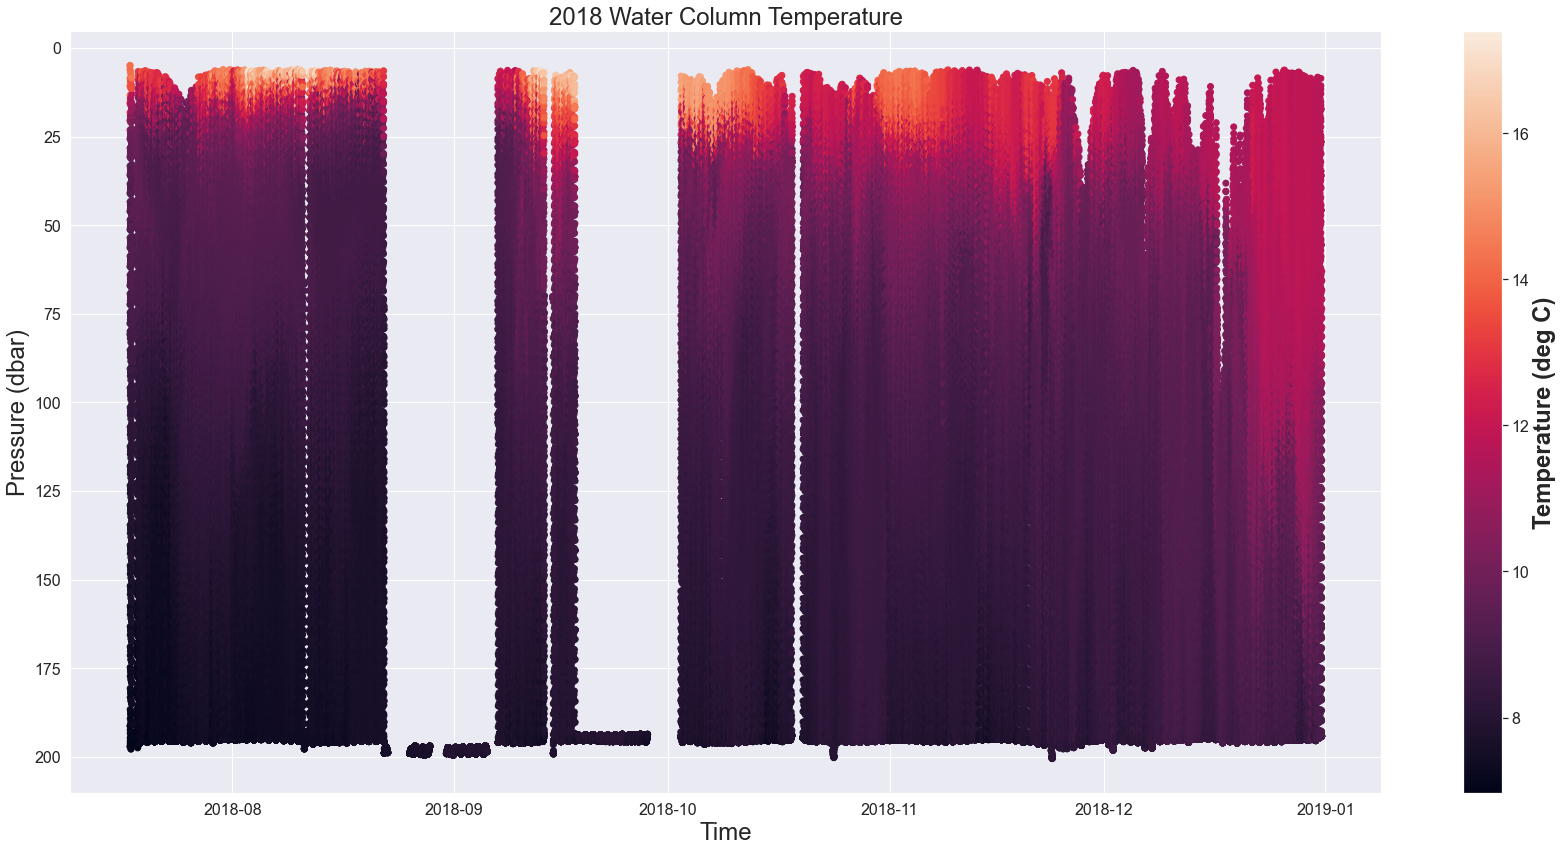

In [39]:
fig, ax = plt.subplots(figsize=(24, 12))

# plot temp and salinity curtain plots
ax.invert_yaxis()
# ax.grid()
#ax1.set_The xlim(profiler_data['time'],profiler_data['time'])
sc = ax.scatter(profiler_minutes['time'],profiler_minutes['seawater_pressure'],c=profiler_minutes['seawater_temperature'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('2018 Water Column Temperature', size=24)

# ax.tick_params(labelsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

cb = fig.colorbar(sc,ax=ax)
cb.set_label(label='Temperature (deg C)',weight='bold', size=24)
cb.ax.tick_params(labelsize=16)

plt.tight_layout();
plt.savefig('../figures/2018_profiler_temp.png')

Wow, when you can finally plot the profiler data in detail, it really is gorgeous! Looks like the mixed layer depth stays quite near the surface (~25 meters) for most of the summer, and then seems to suddenyl drop towards ~100+ meters in December. Let's check the salinity data, too.

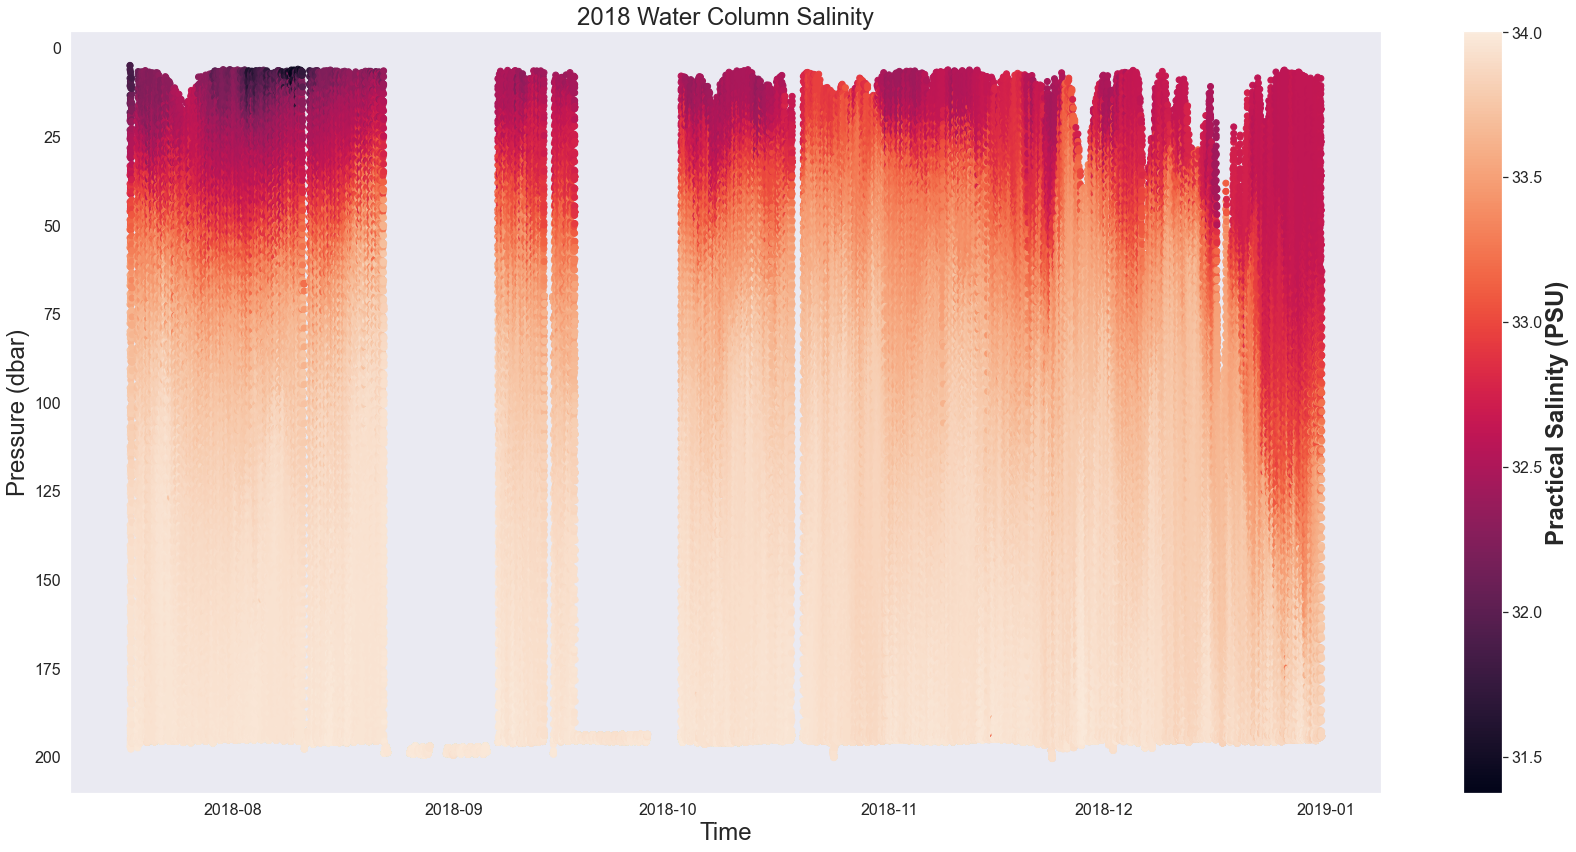

In [40]:
fig, ax = plt.subplots(figsize=(24, 12))

# plot temp and salinity curtain plots
ax.invert_yaxis()
ax.grid()
#ax1.set_xlim(profiler_data['time'],profiler_data['time'])
sc = ax.scatter(profiler_minutes['time'],profiler_minutes['seawater_pressure'],c=profiler_minutes['practical_salinity'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('2018 Water Column Salinity', size=24)

plt.tick_params(axis='both', which='major', labelsize=16)

cb = fig.colorbar(sc,ax=ax)
cb.set_label(label='Practical Salinity (PSU)',weight='bold', size=24)
cb.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('../figures/2018_profiler_salinity.png')

Seeing a similar pattern here. Would love to extend this analysis to include the first months of 2019 to see if the depth of the mixed layer remains deep (potentially due to downwelling?) or if that was a short-lived event (more like a storm or short downwelling event). Also curious what the CUTI value is for that time, is there any chance downwelling conditions pushed the mixed layer that far down?

---
### Platform data

Finally, we can look at the platform data. Hopefully it's more consistent than the profiler data! We'll do all the same steps we've already done - turn time into a datetime, resample, and plot!

In [41]:
platform_data.shape

(10074761, 6)

In [42]:
platform_minutes = platform_data.resample('T', on='time').mean().dropna(how='all').reset_index()

platform_hourly = platform_data.resample('H', on='time').mean().dropna(how='all').reset_index()

platform_daily = platform_data.resample('D', on='time').mean().dropna(how='all').reset_index()

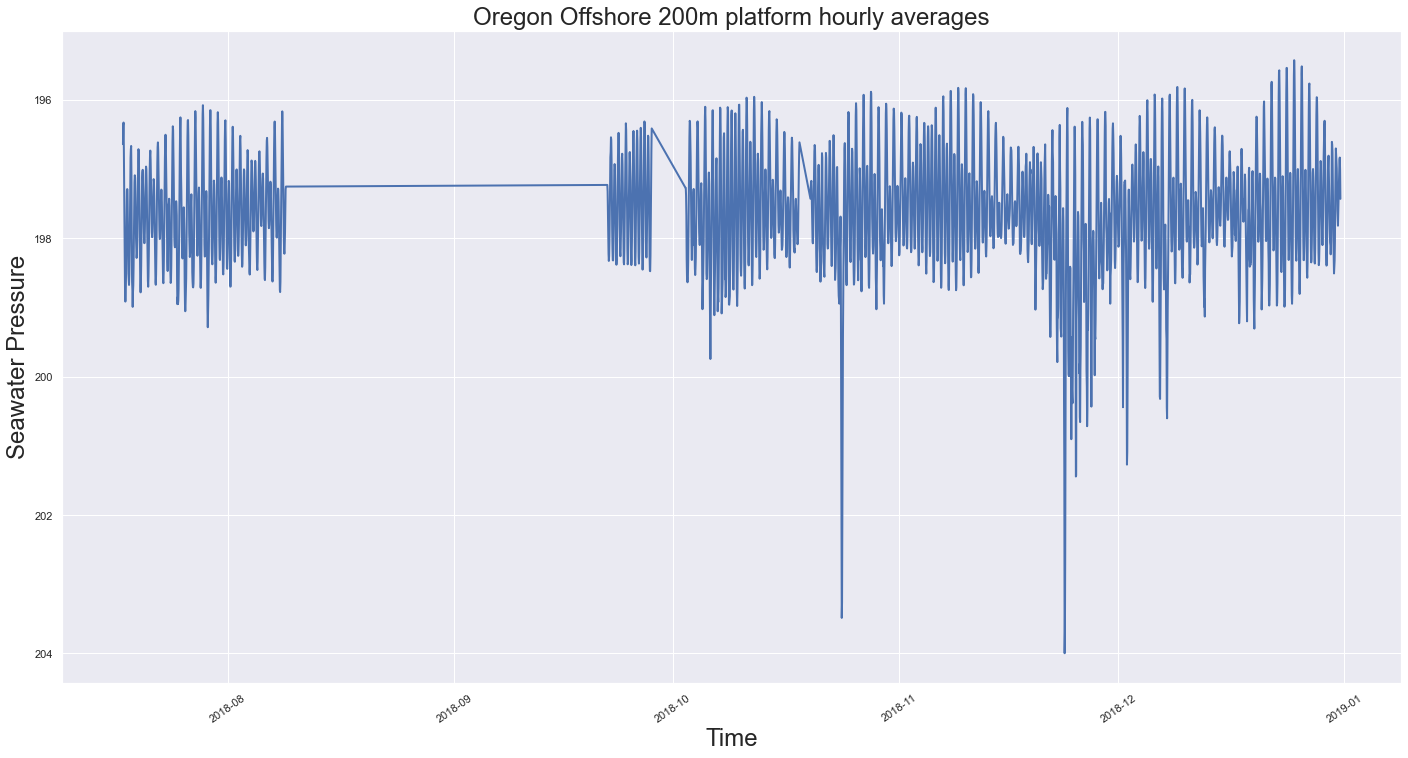

In [43]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(platform_hourly['time'], platform_hourly['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore 200m platform hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

The platform data always seems to have issues of some sort or another. No data was collected for the majority of August and September, bummer. Additionally, the data looks messy towards the start of December. I wonder if this was caused by the same event (?) that disrupted the profiler data around this time. Maybe we'll even see signs of it in the seawater characteristics next.

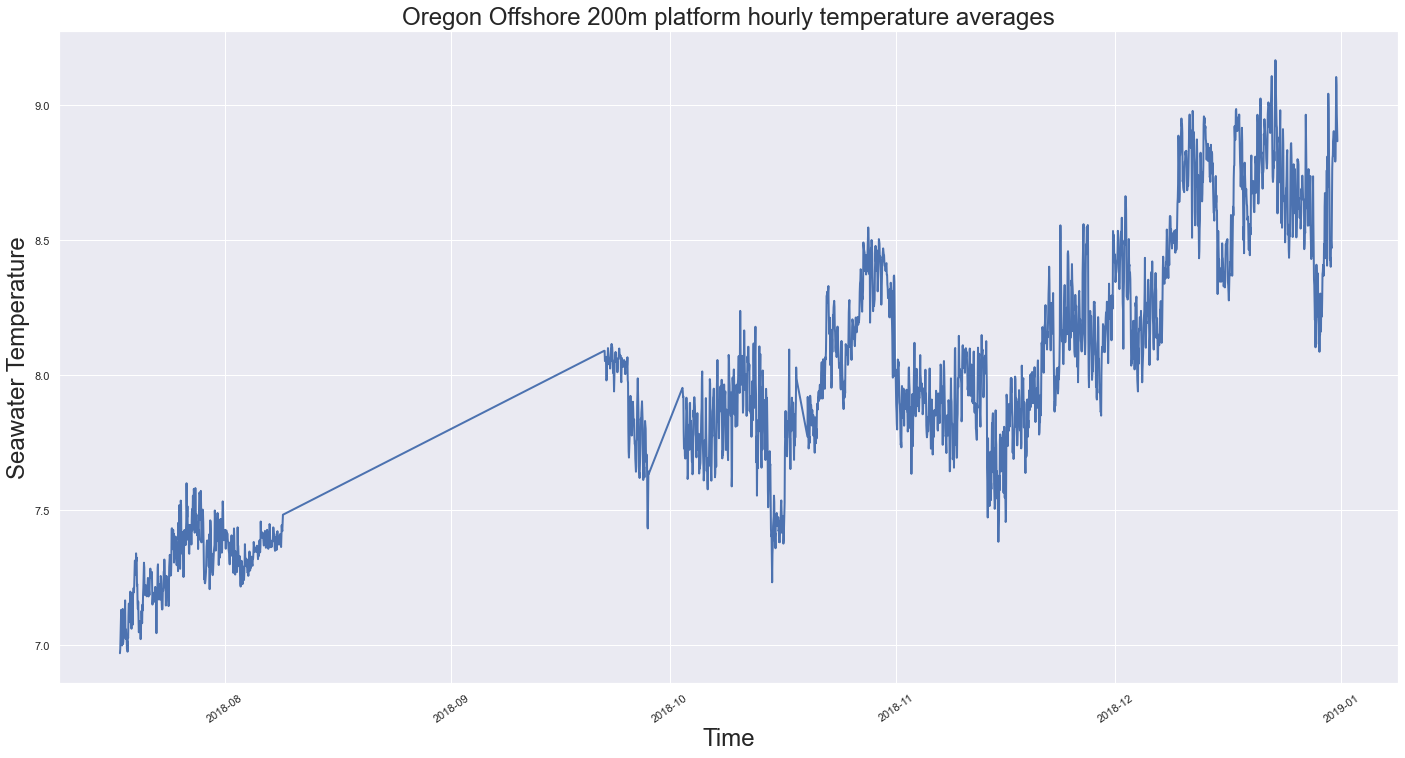

In [44]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Temperature', size=24)
ax.set_title('Oregon Offshore 200m platform hourly temperature averages', size=24)

plt.xticks(rotation=35);

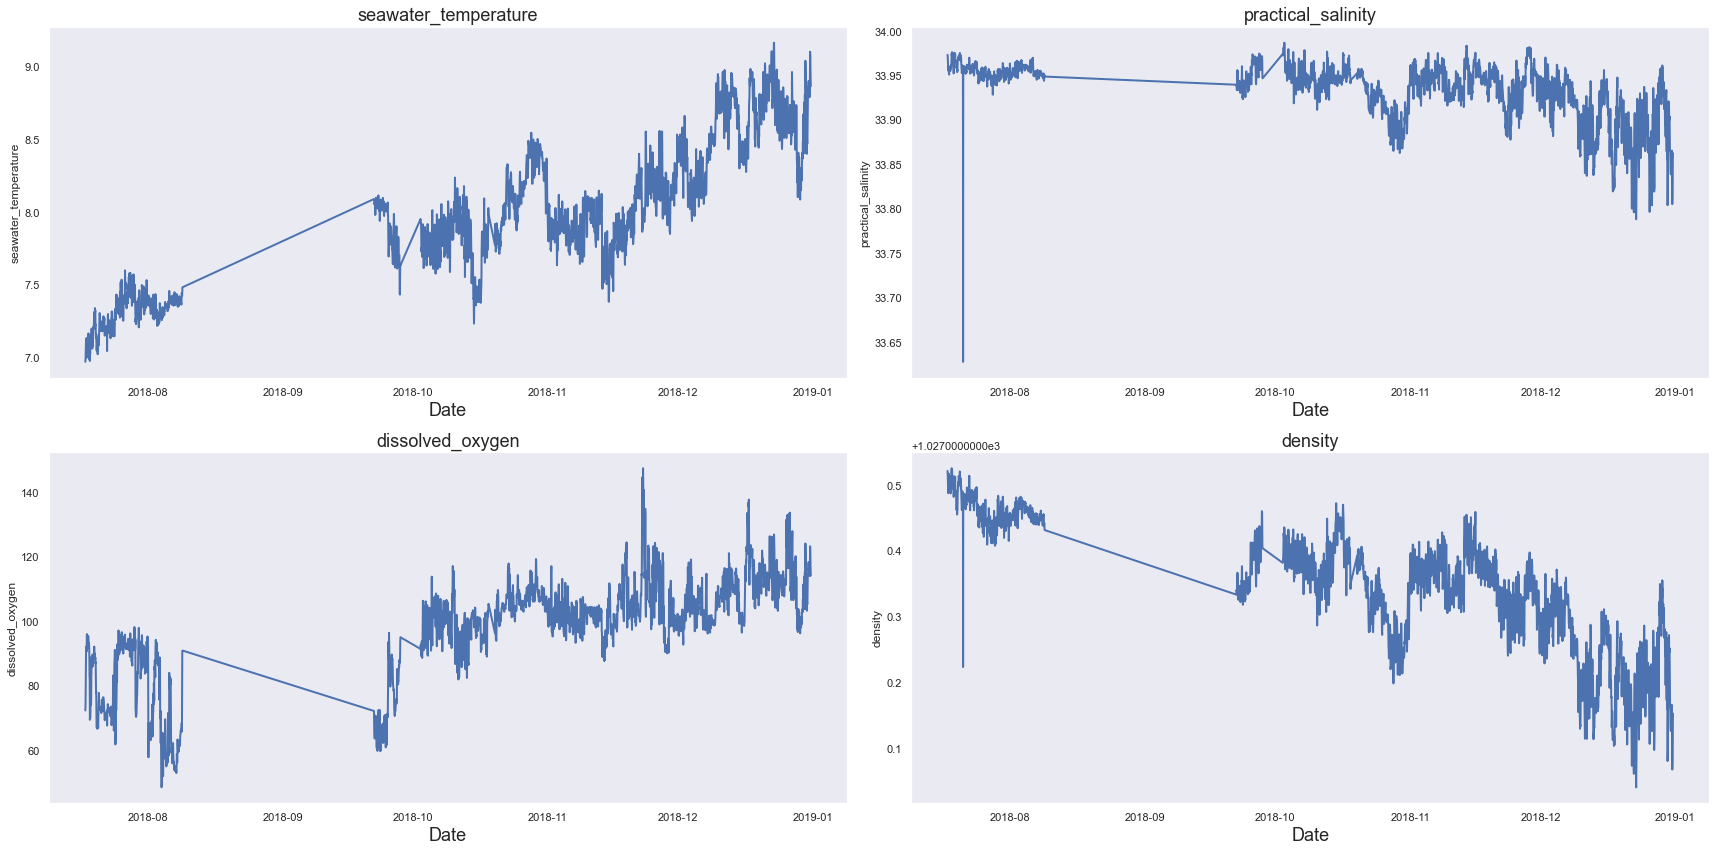

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid()
    ax.set_xlabel('Date', size=18)

#ax1.set_xlim(profiler_week['time'],profiler_week['time'])
ax1.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'b', linewidth=2)
ax1.set_title('seawater_temperature', size=18)
ax1.set_ylabel('seawater_temperature')

ax2.plot(platform_hourly['time'], platform_hourly['practical_salinity'], 'b', linewidth=2)
ax2.set_title('practical_salinity', size=18)
ax2.set_ylabel('practical_salinity')

ax3.plot(platform_hourly['time'], platform_hourly['dissolved_oxygen'], 'b', linewidth=2)
ax3.set_title('dissolved_oxygen', size=18)
ax3.set_ylabel('dissolved_oxygen')

ax4.plot(platform_hourly['time'], platform_hourly['density'], 'b', linewidth=2)
ax4.set_title('density', size=18)
ax4.set_ylabel('density')

plt.tight_layout()
plt.savefig('../figures/platform_multi.png')

Ignore the missing data, do you see that large spike in dissolved oxygen (bottom left panel) towards the start of December? I wonder if there was some really energetic mixing that oxygenated the seawater around the platform while also disrupting its position and the profiler's path. I'm struggling to notice the same effect in the rest of these variables, though. 

Let's plot the platform temperature with SST and compare the two.

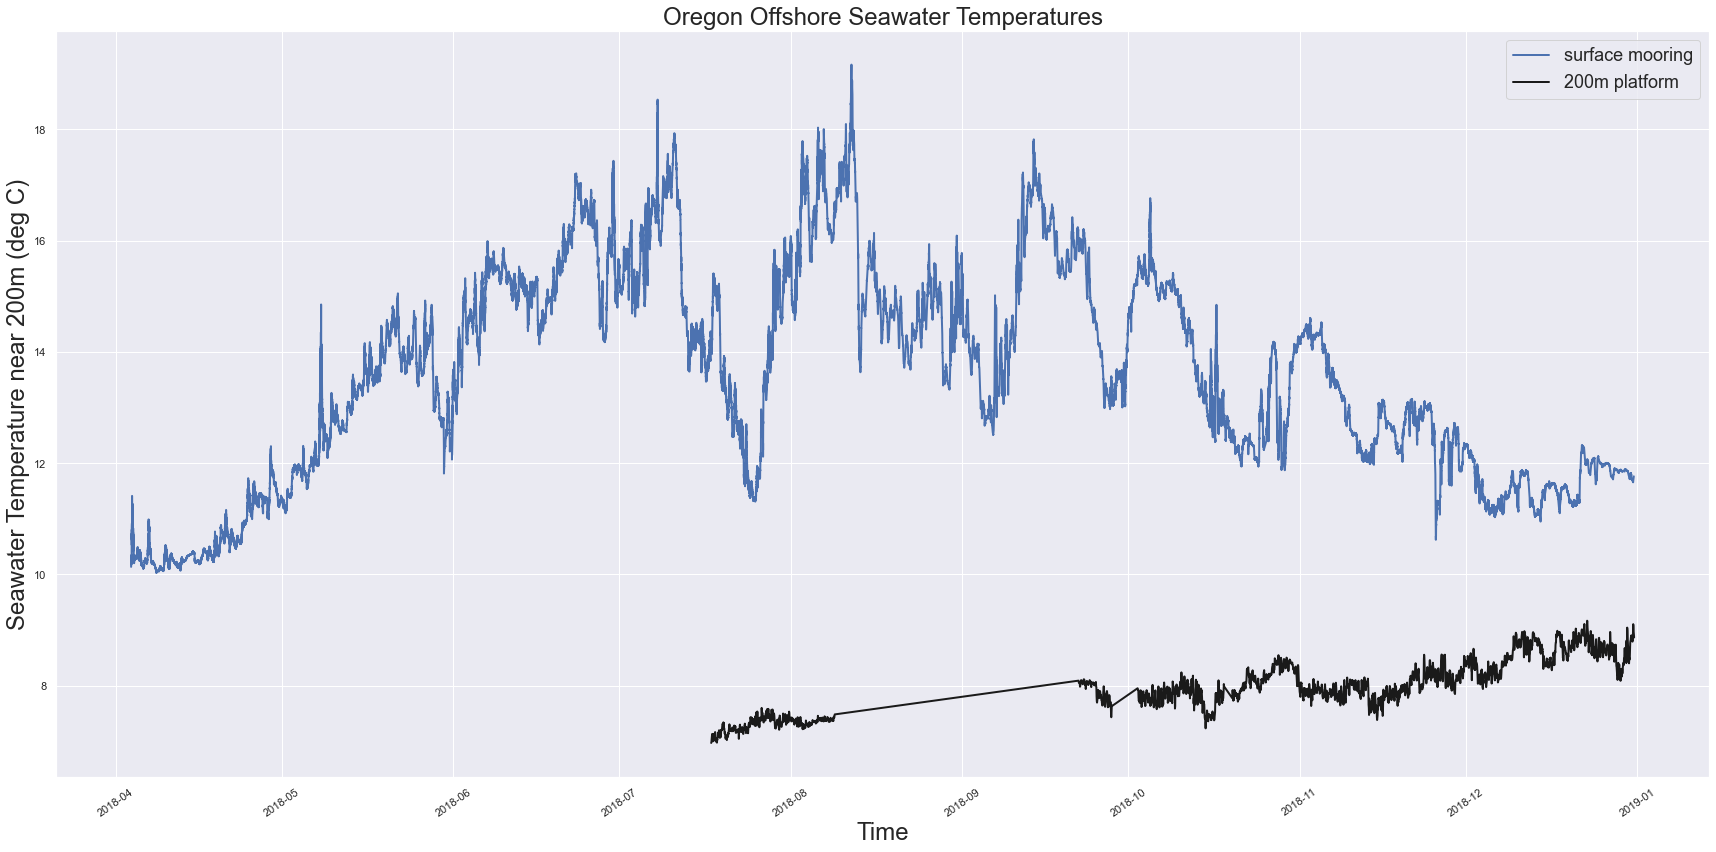

In [46]:
fig, ax = plt.subplots(1,1, sharex=True, figsize = (24, 12)) 

ax.plot(METBK_data['time'], METBK_data['sea_surface_temperature'], 'b', linewidth=2, label='surface mooring')
ax.set_ylabel('Sea Surface Temperature (deg C)', size=24)

ax.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'k', linewidth=2, label='200m platform')
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Temperature near 200m (deg C)', size=24)
ax.set_title('Oregon Offshore Seawater Temperatures', size=24)

plt.legend(fontsize=18)
plt.xticks(rotation=35);
plt.tight_layout()
plt.savefig('../figures/platform_METBK.png')

Amazing to see how varied the watercolumn is in the summer months! I'm still fascinated by the temperature trends being opposite at the surface vs 200 meters: the surface is warmer in summer and colder in winter, while the depths are colder in summer and warmer in winter.

---
### Pull in upwelling index data

I followed the flowchart [provided here](https://oceanview.pfeg.noaa.gov/products/upwelling/which) to determine which upwelling index to use - I settled for the CUTI index! **You'll need to download the CUTI daily indices csv file [from the ERD](https://oceanview.pfeg.noaa.gov/products/upwelling/dnld) and put it into the coastal upwelling output directory manually.**

The CUTI index data includes a year, month, and day column. We can combine these and parse them as a datetime while reading in the data.

In [47]:
CUTI = pd.read_csv('../../coastal_upwelling_output/CUTI_daily.csv',
                  parse_dates=[[0,1,2]],
                  infer_datetime_format=True)

In [48]:
CUTI.rename(columns={'year_month_day':'time'},inplace=True)

This dataset contains index values for several latitudes along the west coast of North America. The OOI Oregon Offshore site is at 44.3 degree North latitude, so we can use the 44N column, which should cover 43.5 to 44.5 degrees North latitude. 

In [49]:
mask = CUTI['time']
CUTI = CUTI[['time', '44N']]

In [50]:
CUTI

time    44N
0     1988-01-01 -0.043
1     1988-01-02 -0.440
2     1988-01-03 -0.514
3     1988-01-04  0.200
4     1988-01-05 -0.082
...          ...    ...
12139 2021-03-27 -0.011
12140 2021-03-28 -0.392
12141 2021-03-29  0.373
12142 2021-03-30  0.973
12143 2021-03-31  0.888

[12144 rows x 2 columns]

In [60]:
mask = (CUTI['time'][:] > '2018-01-01') & (CUTI['time'] <= '2018-12-31')
CUTI = CUTI.loc[mask].reset_index(drop=True)

Why did I get rid of December here? Wanted to see that...

In [61]:
CUTI.describe()

44N
count  364.000000
mean     0.104505
std      0.693341
min     -2.344000
25%     -0.236750
50%      0.120500
75%      0.516250
max      2.077000

In [62]:
CUTI.isna().sum()

time    0
44N     0
dtype: int64

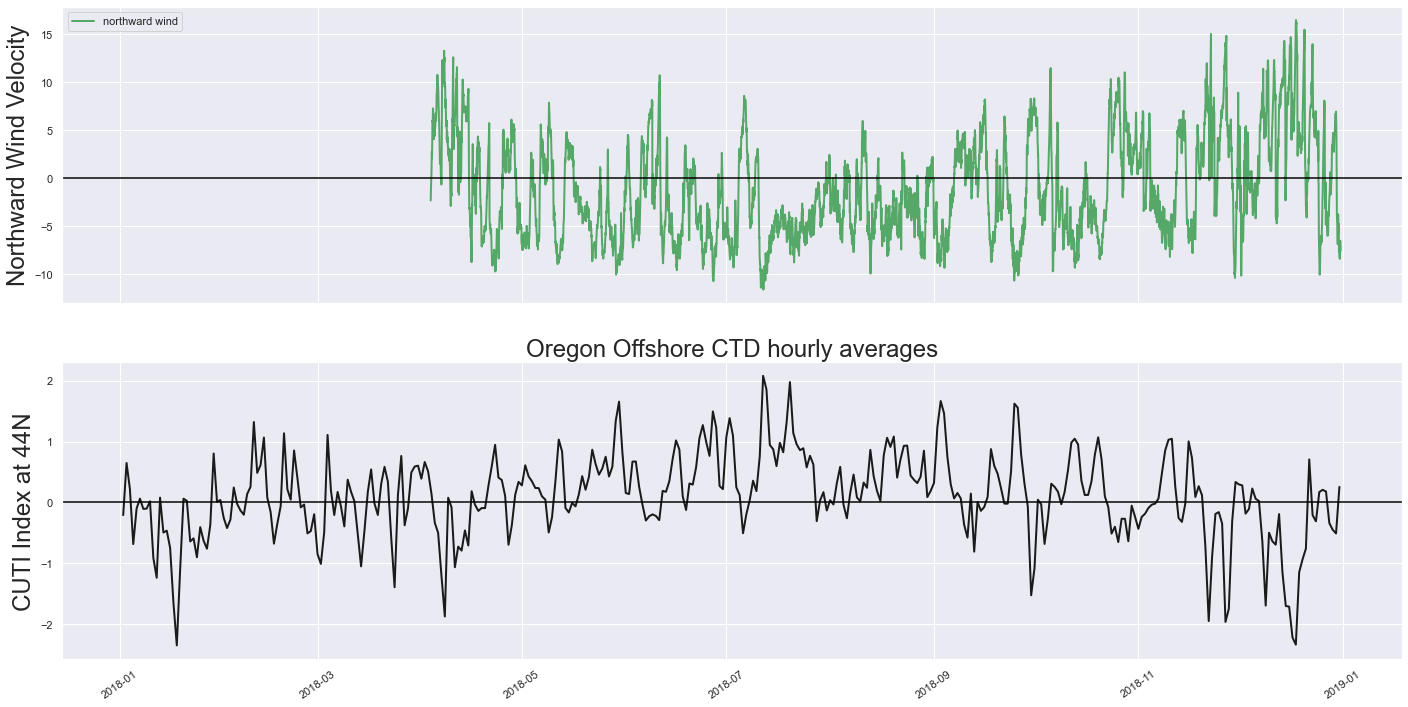

In [63]:
# Plot hourly-averaged METBK data
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(24, 12))
ax1.plot(CUTI['time'], CUTI['44N'], 'k', linewidth=2)
ax1.set_xlabel('')
ax1.set_ylabel('CUTI Index at 44N', size=24)
ax1.set_title('Oregon Offshore CTD hourly averages', size=24)
ax1.axhline(y=0, ls='-', c='black') # add horizontal line at 0

#ax2.plot(METBK_hourly['time'], METBK_hourly['Eastward Wind Velocity (m s-1)'], 'c', label='eastward wind')
ax2.plot(METBK_hourly['time'], METBK_hourly['met_windavg_mag_corr_north'], 'g', label='northward wind', linewidth=2)
ax2.set_ylabel('Northward Wind Velocity', size=24)
ax2.legend()
ax2.axhline(y=0, ls='-', c='black') # add horizontal line at 0

plt.xticks(rotation=35);

In [64]:
METBK_data

time  sea_surface_temperature  \
0      2018-04-03 18:26:39.426999808                   10.135   
1      2018-04-03 18:27:43.659999744                   10.136   
2      2018-04-03 18:28:48.444000256                   10.141   
3      2018-04-03 18:29:52.679000064                   10.141   
4      2018-04-03 18:30:27.203999744                   10.136   
...                              ...                      ...   
310062 2018-12-31 09:35:21.017000448                   11.750   
310063 2018-12-31 09:36:26.114000384                   11.751   
310064 2018-12-31 09:37:30.170999808                   11.758   
310065 2018-12-31 09:38:37.085000192                   11.753   
310066 2018-12-31 09:39:38.632000000                   11.762   

        met_windavg_mag_corr_east  met_windavg_mag_corr_north  
0                       -1.700006                   -1.983426  
1                       -2.854736                   -2.457026  
2                       -1.223021                   -2.973268  
3                       -2.237504                   -2.168889  
4                       -1.361928                   -2.531334  
...                           ...                         ...  
310062                   2.496349                   -6.370490  
310063                   1.183581                   -7.435216  
310064                   2.250494                   -7.588503  
310065                   2.812786                   -6.963421  
310066                   3.301284                   -8.607492  

[310067 rows x 4 columns]

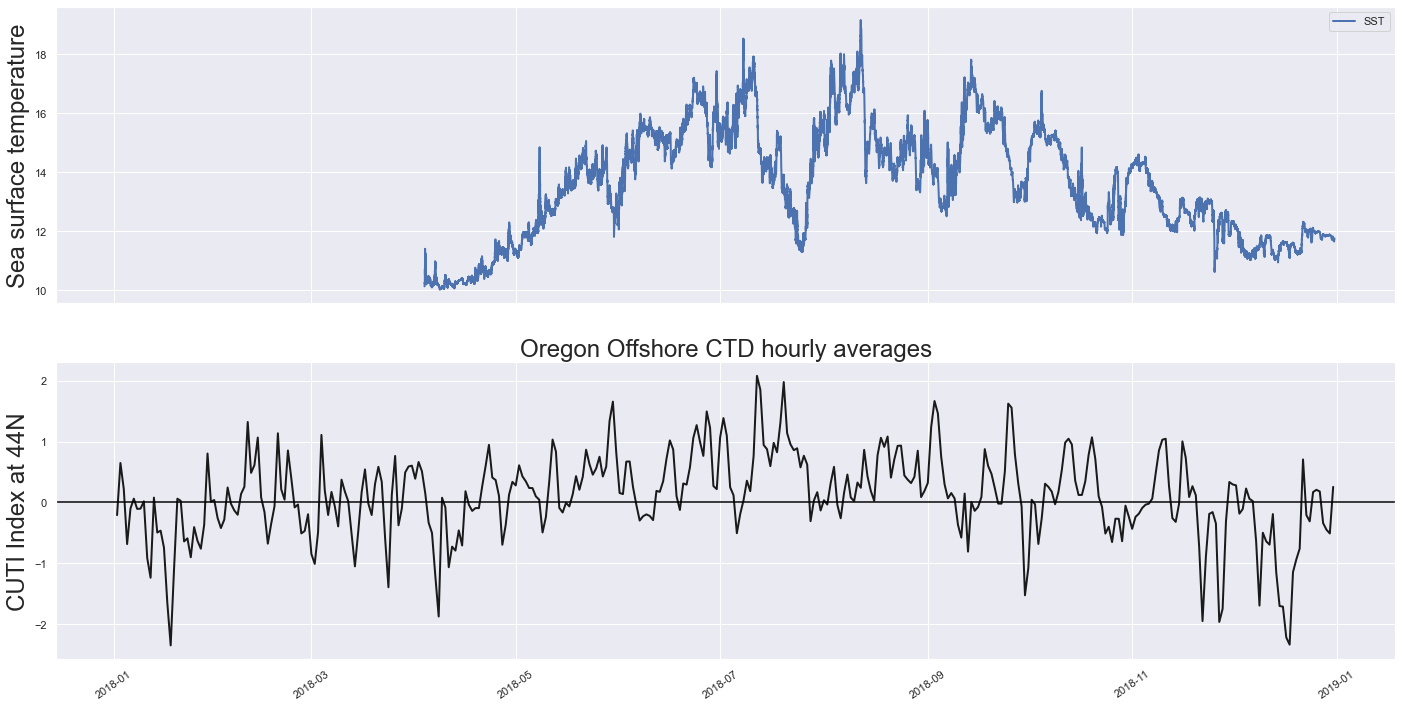

In [65]:
# Plot hourly-averaged METBK data
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(24, 12))
ax1.plot(CUTI['time'], CUTI['44N'], 'k', linewidth=2)
ax1.set_xlabel('')
ax1.set_ylabel('CUTI Index at 44N', size=24)
ax1.set_title('Oregon Offshore CTD hourly averages', size=24)
ax1.axhline(y=0, ls='-', c='black') # add horizontal line at 0

#ax2.plot(METBK_hourly['time'], METBK_hourly['Eastward Wind Velocity (m s-1)'], 'c', label='eastward wind')
ax2.plot(METBK_data['time'], METBK_data['sea_surface_temperature'], 'b', label='SST', linewidth=2)
ax2.set_ylabel('Sea surface temperature', size=24)
ax2.legend()

plt.xticks(rotation=35);

Nice place to explore CUTI data: https://heatherwelch.shinyapps.io/shiny_jacox_cuti/

In [66]:
for var in profiler_var:
    n_obs = len(profiler_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(profiler_daily[var])
    print(f'CUTI correlation with profiler {var} is', round(correlation, 4))

CUTI correlation with profiler seawater_pressure is 0.1593
CUTI correlation with profiler density is 0.1004
CUTI correlation with profiler practical_salinity is 0.1435
CUTI correlation with profiler seawater_temperature is 0.069
CUTI correlation with profiler corrected_dissolved_oxygen is -0.0066


In [67]:
for var in platform_var:
    n_obs = len(platform_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(platform_daily[var])
    print(f'CUTI correlation with platform {var} is', round(correlation, 4))

CUTI correlation with platform seawater_pressure is 0.0273
CUTI correlation with platform density is -0.1001
CUTI correlation with platform practical_salinity is -0.0204
CUTI correlation with platform seawater_temperature is 0.1237
CUTI correlation with platform dissolved_oxygen is 0.1928


In [68]:
for var in METBK_var:
    n_obs = len(METBK_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(METBK_daily[var])
    print(f'CUTI correlation with surface mooring {var} is', round(correlation, 4))

CUTI correlation with surface mooring sea_surface_temperature is 0.0822
CUTI correlation with surface mooring met_windavg_mag_corr_east is -0.2197
CUTI correlation with surface mooring met_windavg_mag_corr_north is -0.0359
